In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
all_df = pd.read_csv('diagnosis.csv', index_col=False)
iub_df = all_df.drop('Decision: Nephritis of renal pelvis origin', axis=1)
nrpo_df = all_df.drop('Decision: Inflammation of urinary bladder', axis=1)
features = iub_df.drop('Decision: Inflammation of urinary bladder', axis = 1)

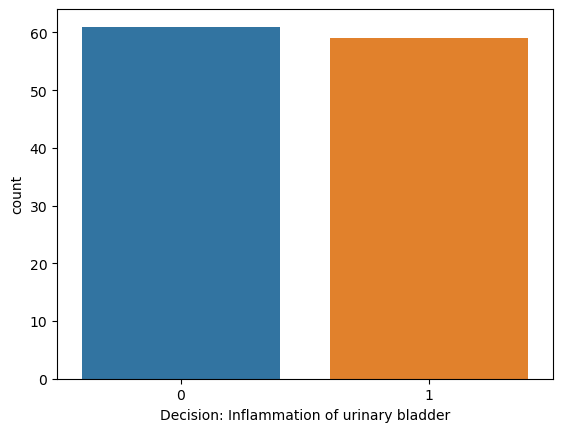

In [3]:
sns.countplot(x="Decision: Inflammation of urinary bladder", data=all_df)

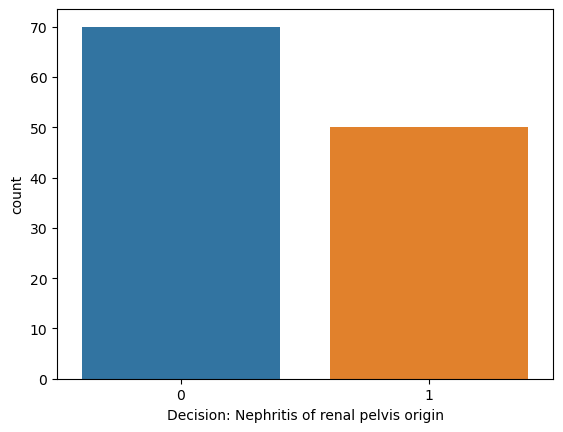

In [4]:
sns.countplot(x="Decision: Nephritis of renal pelvis origin", data=all_df)

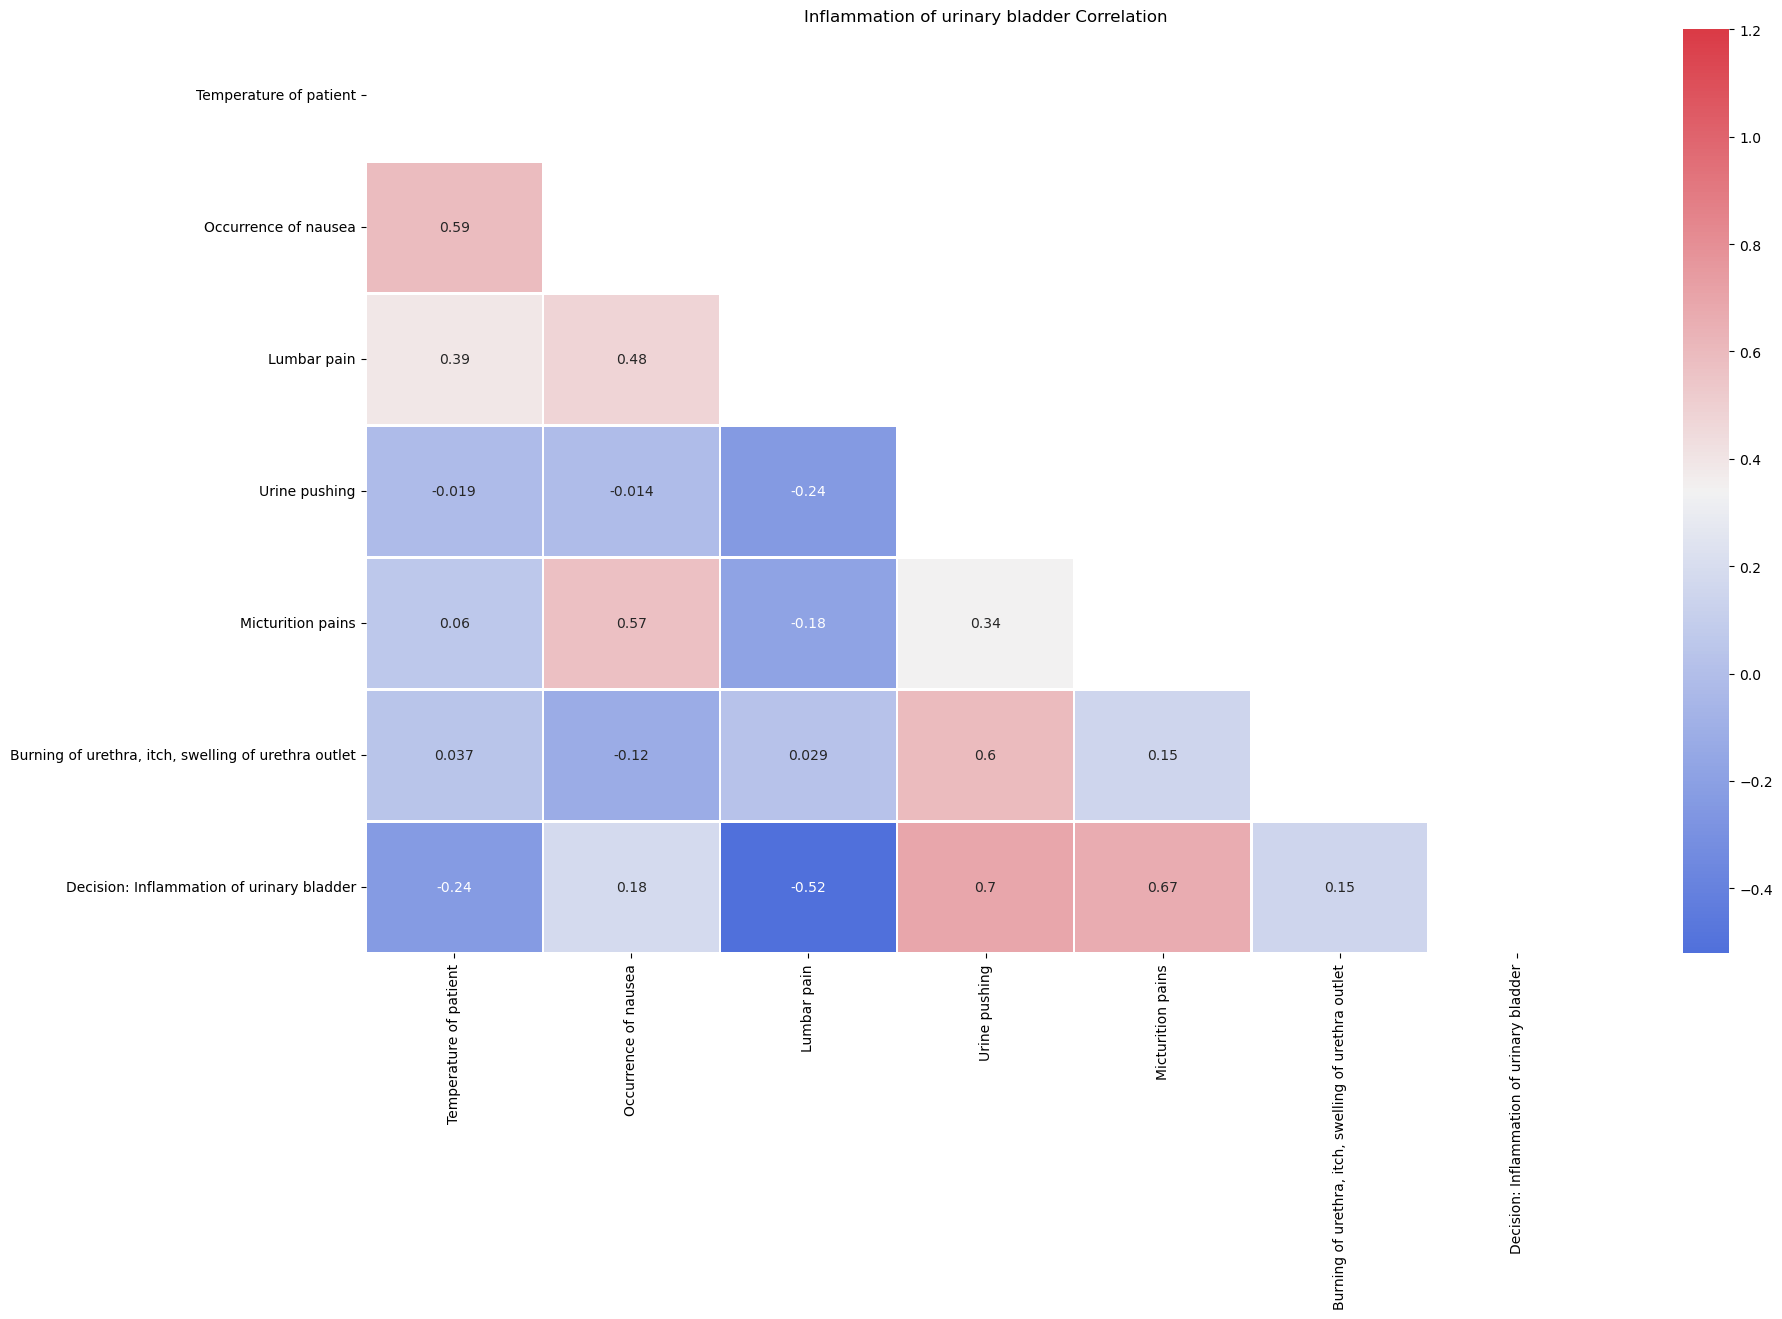

In [5]:
corrMatt = iub_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Inflammation of urinary bladder Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

In [6]:
iub_df_diagnosis = iub_df['Decision: Inflammation of urinary bladder']
nrpo_df_diagnosis = nrpo_df['Decision: Nephritis of renal pelvis origin']

In [7]:
iub_df_features_train, iub_df_features_test, iub_df_diagnosis_train, iub_df_diagnosis_test = train_test_split(features, iub_df_diagnosis, test_size=0.3, random_state=1, stratify=iub_df_diagnosis)
nrpo_df_features_train, nrpo_df_features_test, nrpo_df_diagnosis_train, nrpo_df_diagnosis_test = train_test_split(features, nrpo_df_diagnosis, test_size=0.3, random_state=1, stratify=nrpo_df_diagnosis)

# Logistic Regression

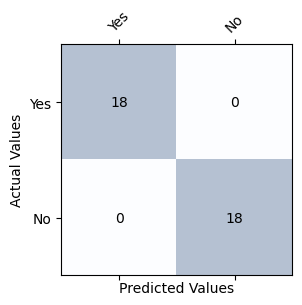

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

clf = LogisticRegression(random_state=0)
iub_pred = clf.fit(iub_df_features_train,iub_df_diagnosis_train).predict(iub_df_features_test)
cm = confusion_matrix(iub_df_diagnosis_test, iub_pred)
# Plot confusion matrix,
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
         ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
classes=["Yes","No"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');

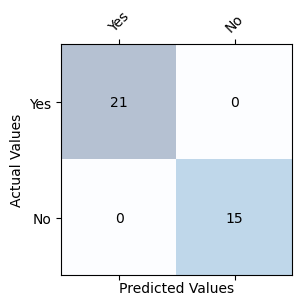

In [12]:
nrpo_pred = clf.fit(nrpo_df_features_train, nrpo_df_diagnosis_train).predict(nrpo_df_features_test)
cm = confusion_matrix(nrpo_df_diagnosis_test, nrpo_pred)
# Plot confusion matrix,
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
         ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
classes=["Yes","No"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');

# SVM

In [81]:
from sklearn.svm import SVC
clf = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
clf.fit(iub_df_features_train, iub_df_diagnosis_train)

classifier_score = clf.score(iub_df_features_test, iub_df_diagnosis_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))


The classifier accuracy score is 1.00


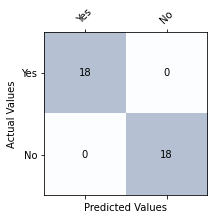

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

iub_pred = clf.fit(iub_df_features_train, iub_df_diagnosis_train).predict(iub_df_features_test)
cm = confusion_matrix(iub_df_diagnosis_test, iub_pred)
# Plot confusion matrix,
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
         ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
classes=["Yes","No"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');

In [85]:
clf = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
clf.fit(nrpo_df_features_train, nrpo_df_diagnosis_train)

classifier_score = clf.score(nrpo_df_features_test, nrpo_df_diagnosis_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))

The classifier accuracy score is 1.00


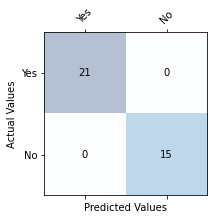

In [86]:
nrpo_pred = clf.fit(nrpo_df_features_train, nrpo_df_diagnosis_train).predict(nrpo_df_features_test)
cm = confusion_matrix(nrpo_df_diagnosis_test, nrpo_pred)
# Plot confusion matrix,
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
         ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
classes=["Yes","No"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');